In [ ]:
# うまくいかない場合、最初にカーネルをリスタートするのが効果的かも

In [1]:
import os

file_path = "../data/practice2-1/kageotoko.txt"

if os.path.exists(file_path):
    print("ファイルが存在します:", file_path)
else:
    print("ファイルが存在しません:", file_path)

ファイルが存在します: ../data/practice2-1/kageotoko.txt


In [1]:
!pip cache purge
!pip install numpy pandas matplotlib scipy statsmodels scikit-learn tensorflow wordcloud

# spaCyとginzaをアンインストール
!pip uninstall -y spacy ginza ja_ginza

# 必要なバージョンを再インストール
!pip install spacy==3.0
!pip install ginza
!pip install --no-cache-dir spacy ginza ja_ginza



!pip install chardet

Files removed: 413
Found existing installation: spacy 3.8.2
Uninstalling spacy-3.8.2:
  Successfully uninstalled spacy-3.8.2
Found existing installation: ginza 5.2.0
Uninstalling ginza-5.2.0:
  Successfully uninstalled ginza-5.2.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 3.7 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [167 lines of output]
      
      Error compiling Cython file:
      ------------------------------------------------------------
      ...
          int length
      
      
      cdef class Vocab:
          cdef Pool mem
          cpdef readonly StringStore strings
                ^
      ------------------------------------------------------------
      
      spacy/vocab.pxd:28:10: Variables cannot be declared with 'cpdef'. Use 'cdef' instead.
      
   

In [23]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 3.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 4.3 MB/s eta 0:00:00a 0:00:01


In [4]:
import os
print(os.getcwd())

/home/jovyan/notebooks


In [2]:
# Q1-0

import re
import chardet

output_file_path = "../data/practice2-1/cleaned_data5-1.txt"  # 前処理を施した後の出力先

try:
    # 文字コードを検出
    with open(file_path, mode='rb') as file:
        raw_data = file.read()  # ファイル全体を読み込む
        result = chardet.detect(raw_data)  # 文字コードを検出
        encoding = result['encoding']  # 検出された文字コードを取得
        print(f"検出されたエンコーディング: {encoding}")

    # 検出された文字コードで再度ファイルを読み込む
    with open(file_path, mode='r', encoding=encoding) as file:
        lines = file.readlines()  # ファイル全体を行ごとにリストで読み込み

    # 冒頭18行と末尾14行を除去
    content = lines[18:-14]  # 行スライスで必要な部分を抽出
    text = "".join(content)  # リストを結合して1つの文字列にする

    # タグ除去処理
    text_cleaned = re.sub(r"｜(.*?)《.*?》", r"\1", text)  # 「｜親文字《ルビ》」形式を「親文字」に変換
    text_cleaned = re.sub(r"《.*?》", "", text_cleaned)  # 念のため「《ルビ》」単体の削除
    text_cleaned = re.sub(r"［＃.*?］", "", text_cleaned)  # ［＃入力者注］を削除


    # 結果を新しいファイルに保存
    with open(output_file_path, mode='w', encoding='utf-8') as output_file:
        output_file.write(text_cleaned)

    print(f"処理が完了しました。結果を {output_file_path} に保存しました。")

except FileNotFoundError:
    print(f"ファイルが見つかりません: {file_path}")
except UnicodeDecodeError:
    print("文字コードのデコードに失敗しました。UTF-8以外の文字コードが使用されている可能性があります。")
except Exception as e:
    print(f"予期しないエラーが発生しました: {e}")

検出されたエンコーディング: SHIFT_JIS
処理が完了しました。結果を ../data/practice2-1/cleaned_data5-1.txt に保存しました。


In [3]:
#q1-1

import spacy

#ja_ginzaのロード
nlp = spacy.load("ja_ginza")

#対象の文
text = "今日はラーメンを食べる"

#解析
doc = nlp(text)

#分かち書きの出力
print("分かち書き:", "/".join([token.text for token in doc]))

#形態素解析の出力
print("\n形態素解析の出力:")
print(f"{'形態素':<10} {'活用形':<10} {'品詞':<10}")
print("-" * 30)

for token in doc:
    print(f"{token.text:<10} {token.morph.get('Inflection', ['-'])[0]:<10} {token.pos_:<10}")

分かち書き: 今日/は/ラーメン/を/食べる

形態素解析の出力:
形態素        活用形        品詞        
------------------------------
今日         -          NOUN      
は          -          ADP       
ラーメン       -          NOUN      
を          -          ADP       
食べる        下一段-バ行;終止形-一般 VERB      


In [6]:
#Q1-2

# ファイルからテキストを読み込む
with open(output_file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# 各行を分かち書き
results1 = []
for line in lines:
    line = line.strip()  # 改行や余分な空白を削除
    if line:  # 空行を無視
        doc = nlp(line)
        results1.append("/".join([token.text for token in doc]))

# 結果の冒頭10行を表示
print("分かち書き結果の冒頭10行:")
for i, result in enumerate(results1[:10], start=1):
    print(f"{i}: {result}")

分かち書き結果の冒頭10行:
1: 三十二/、/三/歳/に/見える/やせ型/の/男/が/、/張/ホテル/の/玄関/を/はいっ/て/、/カウンター/の/うしろ/の/支配人/室/へ/踏みこん/で/いっ/た/。
2: ずんぐり/と/背/が/低く/て/丸々/と/太っ/た/ちょびひげ/の/支配人/が/デスク/に/向かっ/て/帳簿/を/いじくっ/て/い/た/。/そば/の/灰/ざら/に/のせ/た/半分/ほど/に/なっ/た/葉巻き/から/、/細い/紫色/の/煙/が/ほとんど/まっすぐ/に/立ちのぼっ/て/い/た/。/ハバナ/の/かおり/が/何/か/猥/※/《/わいせつ/》/な/感じ/で/漂っ/て/い/た/。
3: 「/来/て/いる/ね/？/」
4: やせ型/の/男/が/ニヤッ/と/笑っ/て/たずね/た/。
5: 「/うん/、/来/て/いる/。/もう/始まっ/て/いる/ころ/だ/よ/」
6: 「/じゃあ/、/あの/へや/へ/行く/よ/」
7: 「/いい/とも/、/見つかり/っこ/は/ない/が/、/せいぜい/用心/し/て/ね/」
8: やせ型/の/男/は/ネズミ色/の/セビロ/を/着/て/、/ネズミ色/の/ワイシャツ/、/ネズミ色/の/ネクタイ/、/くつ/まで/ネズミ色/の/もの/を/はい/て/い/た/。/どんな/背景/の/前/で/も/最も/目だた/ない/服装/で/あっ/た/。/かれ/は/まったく/足音/を/たて/ない/で/階段/を/駆け上がり/、/二/階/の/ずっと/奥まっ/た/一室/の/ドア/を/そっと/ひらい/て/、/中/に/すべりこむ/と/、/電灯/も/つけ/ず/、/一方/の/壁/に/ある/押し入れ/の/戸/を/用意/の/カギ/で/ひらき/、/その/中/へ/身/を/隠し/た/。
9: まっくら/だ/けれど/、/かれ/は/その/へや/の/構造/を/手/に/とる/よう/に/知っ/て/い/た/。/そこ/は/普通/の/ホテル/の/客間/で/、/寝室/と/居間/と/を/兼ね/た/五/坪/ほど/の/狭い/へや/で/あっ/た/。/一方/の/壁/に/押し入れ/の/よう/に/造り/つけ/た/洋服/戸だな/が/あっ/て/、/かれ/が/忍びこん/だ/の/は/、/その/からっぽ/の/洋服/戸だな/で/あっ/た/。
10: 戸だな/の/中/は/パッ/と/目/も/くらむ/ほど/明るく/、/ギラギラ/し/た

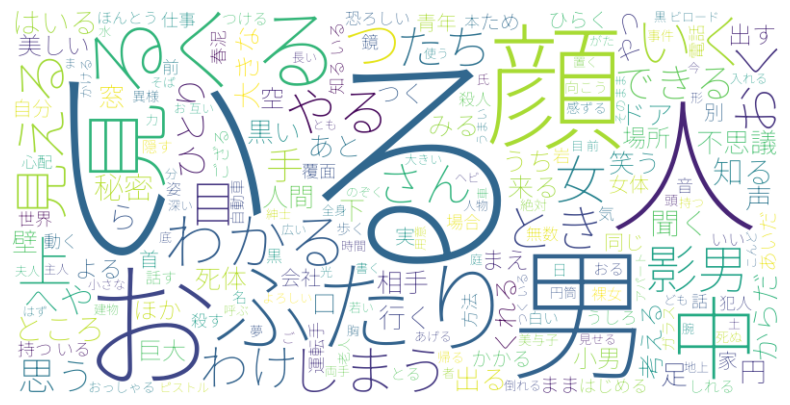

In [7]:
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# ストップワードと対象品詞
stopwords = {'する', 'ある', 'ない', 'いう', 'もの', 'こと', 'よう', 'なる', 'ほう'}
include_pos = {'NOUN', 'VERB', 'ADJ'}  # 名詞、動詞、形容詞

nlp = spacy.load("ja_ginza")
output_file_path = "../data/practice2-1/cleaned_data5-1.txt"

# フィルタリングして単語リストを作成
filtered_words = []

# 一行ずつ読み込んで処理
with open(output_file_path, "r", encoding="utf-8") as file:
    lines = file.readlines()

# 100行ずつチャンクに分ける
chunks = [' '.join(lines[i:i+100]) for i in range(0, len(lines), 100)]

# 各チャンクに対して処理
for chunk in chunks:
    doc = nlp(chunk)
    filtered_words.extend([
        token.lemma_  # 原形を使用
        for token in doc
        if token.pos_ in include_pos and token.lemma_ not in stopwords
    ])

# ワードクラウド用テキストの生成
wordcloud_text = " ".join(filtered_words)

# ワードクラウドの生成
wordcloud = WordCloud(
    font_path="../data/practice2-1/Noto_Sans_JP/NotoSansJP-VariableFont_wght.ttf",  # 日本語フォントのパスを指定
    width=800,
    height=400,
    background_color="white",
    colormap="viridis"
).generate(wordcloud_text)

# ワードクラウドの表示
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
